In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
df = pd.read_csv('preprocessed_diabetes.csv')

In [13]:
df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,...,metformin_1,repaglinide_1,glipizide_1,glyburide_1,pioglitazone_1,rosiglitazone_1,acarbose_1,insulin_1,change_1,diabetesMed_1
0,1,41,0,1,0,0,0,1,-99,-99,...,0,0,0,0,0,0,0,0,0,0
1,3,59,0,18,0,0,0,9,-99,-99,...,0,0,0,0,0,0,0,1,1,1
2,2,11,5,13,2,0,1,6,-99,-99,...,0,0,1,0,0,0,0,0,0,1
3,2,44,1,16,0,0,0,7,-99,-99,...,0,0,0,0,0,0,0,1,1,1
4,1,51,0,8,0,0,0,5,-99,-99,...,0,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,3,51,0,16,0,0,0,9,-99,2,...,1,0,0,0,0,0,0,1,1,1
97084,5,33,3,18,0,0,1,9,-99,-99,...,0,0,0,0,0,0,0,1,0,1
97085,1,53,0,9,1,0,0,13,-99,-99,...,1,0,0,0,0,0,0,1,1,1
97086,10,45,2,21,0,0,1,9,-99,-99,...,0,0,1,0,1,0,0,1,1,1


In [14]:
X = df
y = df.readmitted

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from matplotlib.legend_handler import HandlerLine2D

In [17]:
%%time
#SGD
sgd = SGDClassifier(loss='log', shuffle=True, random_state=42)

print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(sgd, X_train, y_train, cv=25))))
sgd.fit(X_train, y_train)
y_predsgd= sgd.predict(X_test)
print("Test score: {:.2%}".format(sgd.score(X_test, y_test)))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_predsgd)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_predsgd)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_predsgd)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, y_predsgd)))

Cross Validation Score: 96.99%
Test score: 99.93%
Accuracy is 1.00
Precision is 1.00
Recall is 1.00
AUC is 1.00
Wall time: 12.1 s


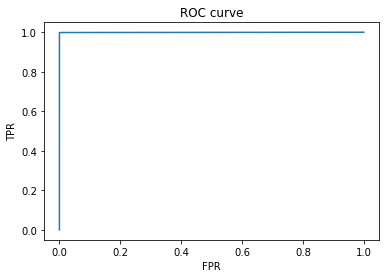

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_predsgd)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [19]:
%%time
#Decision Tree
dtree = DecisionTreeClassifier(random_state=42, max_depth=15)

print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtree, X_train, y_train, cv=25))))
dtree.fit(X_train, y_train)
y_preddt= dtree.predict(X_test)
print("Test score: {:.2%}".format(sgd.score(X_test, y_test)))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_preddt)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_preddt)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_preddt)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, y_preddt)))

Cross Validation Score: 100.00%
Test score: 99.93%
Accuracy is 1.00
Precision is 1.00
Recall is 1.00
AUC is 1.00
Wall time: 2.82 s


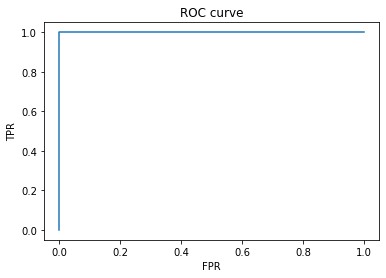

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_preddt)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [21]:
%%time
#KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_predknn= knn.predict(X_test)

Wall time: 31.4 s


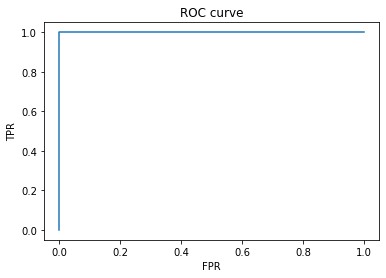

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_preddt)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [23]:
%%time
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_prednb= nb.predict(X_test)

Wall time: 250 ms


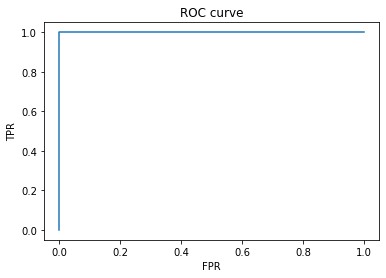

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_preddt)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [25]:
%%time
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predlr= lr.predict(X_test)

Wall time: 2.1 s


C:\Users\Donghyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


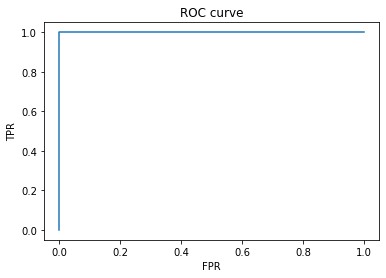

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_preddt)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [27]:
ypred = [y_predsgd, y_preddt, y_predknn, y_prednb, y_predlr]

In [28]:
for algo in ypred:
    print(metrics.confusion_matrix(y_test, algo, labels=[0, 1]))
    print(metrics.accuracy_score(y_test, algo))
    print(metrics.classification_report(y_test, algo, labels=[0, 1]))

[[15370     1]
 [   20 13736]]
0.9992790194664743
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15371
           1       1.00      1.00      1.00     13756

    accuracy                           1.00     29127
   macro avg       1.00      1.00      1.00     29127
weighted avg       1.00      1.00      1.00     29127

[[15371     0]
 [    0 13756]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15371
           1       1.00      1.00      1.00     13756

    accuracy                           1.00     29127
   macro avg       1.00      1.00      1.00     29127
weighted avg       1.00      1.00      1.00     29127

[[11882  3489]
 [ 5612  8144]]
0.6875407697325505
              precision    recall  f1-score   support

           0       0.68      0.77      0.72     15371
           1       0.70      0.59      0.64     13756

    accuracy                           0.69    

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}

gs = GridSearchCV(rf, param_grid, cv=3, refit=True)
bestForest = gs.fit(X_train2, y_train2)

In [ ]:
y_pred = gs.predict(X_test2)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc